In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

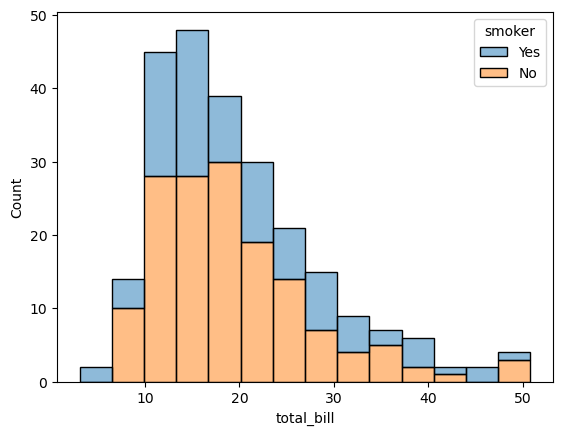

In [22]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.

sns.histplot(data=tips, x="total_bill", hue="smoker", multiple="stack", alpha=0.5)
plt.show()

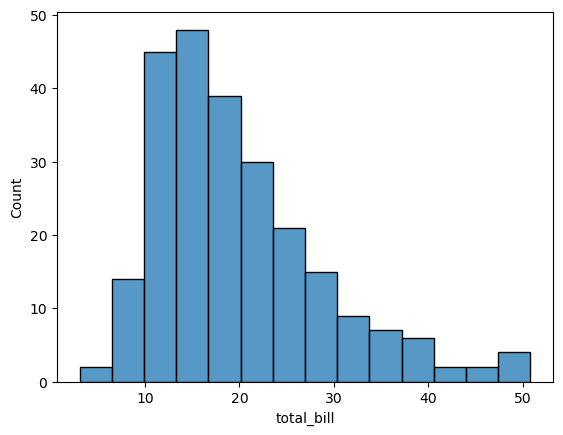

In [18]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

sns.histplot(data=tips, x="total_bill")
plt.show()


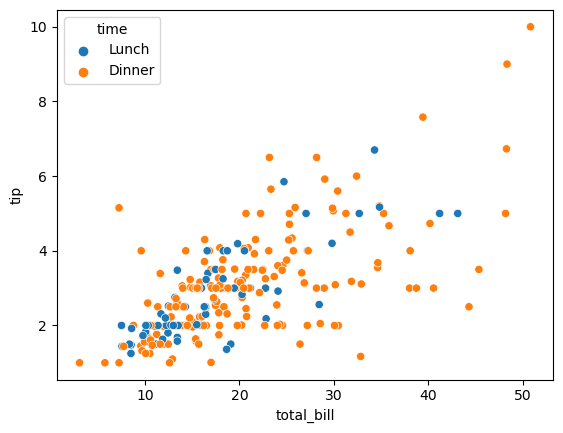

In [17]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.show()

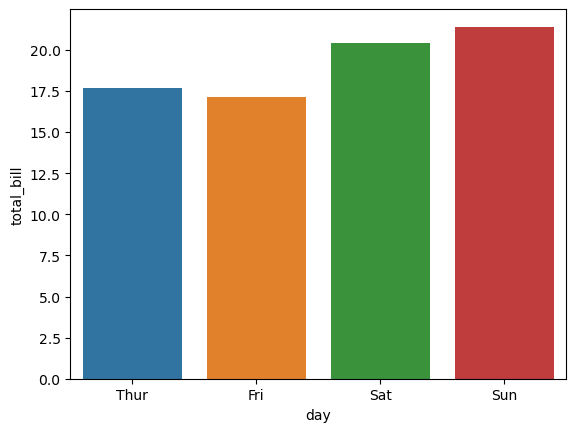

In [16]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

daily_avg = tips.groupby('day')['total_bill'].mean()

sns.barplot(x=daily_avg.index, y=daily_avg)
plt.show()

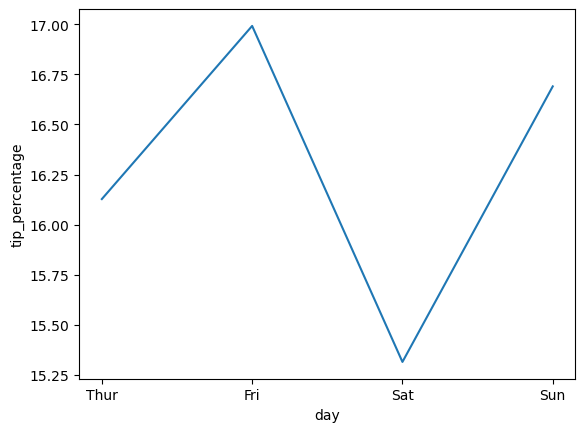

In [15]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.
tips['tip_percentage'] = tips['tip'] / tips['total_bill'] * 100
daily_tip_pct = tips.groupby('day')['tip_percentage'].mean()
sns.lineplot(data=daily_tip_pct)
plt.show()

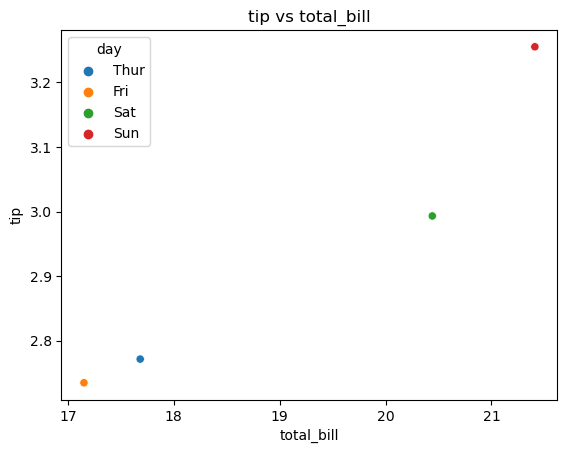

In [13]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

daily_avg = tips.groupby('day')[['total_bill', 'tip']].mean()

sns.scatterplot(
    data=daily_avg,
    x='total_bill',
    y='tip',
    hue="day"
)

plt.title("tip vs total_bill")
plt.show()

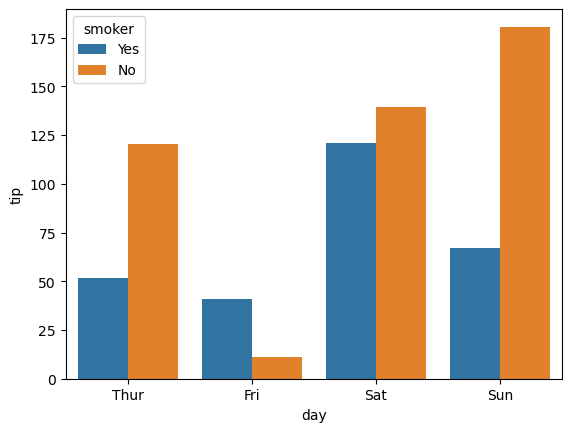

In [9]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

grouped_data = tips.groupby(["day", "smoker"])["tip"].sum().reset_index()

sns.barplot(data = grouped_data,
            x="day", y="tip",
            hue="smoker")
plt.show()

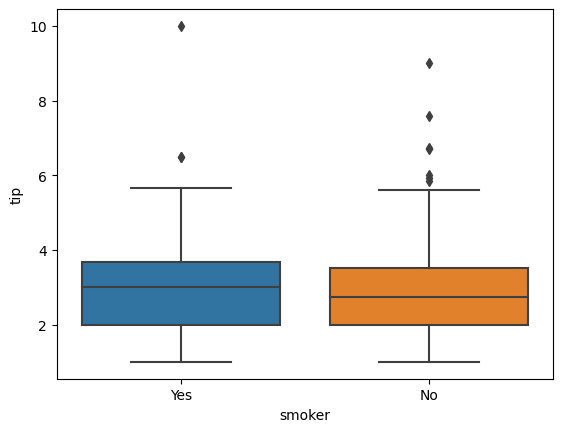

In [6]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.
sns.boxplot(    data=tips,
    x = "smoker",
    y = "tip")
plt.show()

In [ ]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.